
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [2]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for vizualisations and plots
from matplotlib import pyplot as plt # used for visualizations
import pylab # used for ...
import pingouin as pg # used for statical calculations

In [3]:
df_mh = pd.read_csv('MillerHadenData.csv')


In [4]:
# Q1a (code):
# Display first few rows of the dataframe

df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [5]:
# Check data types and information

df_mh.dtypes #double check this


# a.'Participant' is ordinal, 'Abil' is interval, 'IQ' is interval, 'Home' is ratio, 'TV' is ratio

Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object

In [7]:
# Q1b (code):
# Check for missing values
df_mh.info() #double check this


# Check whether there is a data point for each participant on both variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [8]:
df_mh['IQ'].isnull().values.any()

False

In [9]:
df_mh['Abil'].isnull().values.any()

False

As we can see using the `info()` function, we have 25 non-null values for all of our columns. As we have 25 entries in total this means that we have no null values at all in our data set! Additionally, we can use the `isnull()` function, which returns a Boolean `True` whenever there is a null value. We can chain it together with `values.any()` to see if any of the values returned are true. As expected, we get a 'False' for both IQ and Reading Ability, which means there are no null values in these columns.

array([[<Axes: title={'center': 'Abil'}>, <Axes: title={'center': 'IQ'}>]],
      dtype=object)

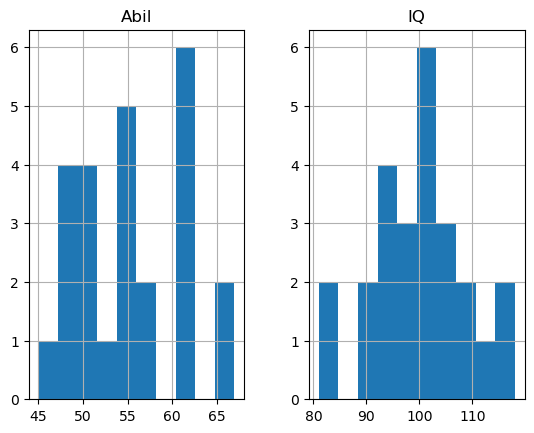

In [16]:
# Q1c (code):
# Check data distribution
df_mh[['Abil', 'IQ']].hist()


In [10]:
# These histograms already give us an impression but are not enough to know
# that these are indeed normal distributions.
# Therefore, I will use the Shapiro-Wilk test
from scipy import stats

In [11]:
stats.shapiro(df_mh['Abil'])

ShapiroResult(statistic=0.9487950205802917, pvalue=0.2354886382818222)

In [12]:
stats.shapiro(df_mh['IQ'])

ShapiroResult(statistic=0.9636043310165405, pvalue=0.4908201992511749)

If the Shapiro-Wilk test is non-significant (p > .05) it tells us that the distribution of the sample is not significantly different from a normal distribution. If, however, the test is significant (p < .05) then the distribution in question is significantly different from a normal distribution. 

As the results p-value for both are above 0.05 we can conclude that the sample is not significantly different from a normal distribution. 

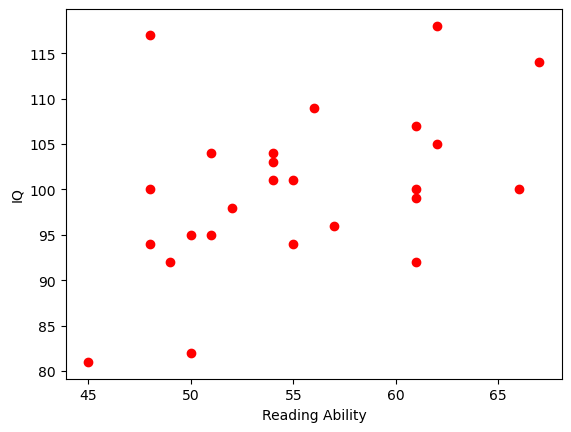

In [19]:
# Q1d (code):
# Scatter plot

reading_ability = df_mh['Abil']
iq = df_mh['IQ']

plt.scatter(reading_ability,iq, c="r")
plt.xlabel("Reading Ability") # what you plot on the X axis
plt.ylabel("IQ") # what you plot on the Y axis
plt.show()

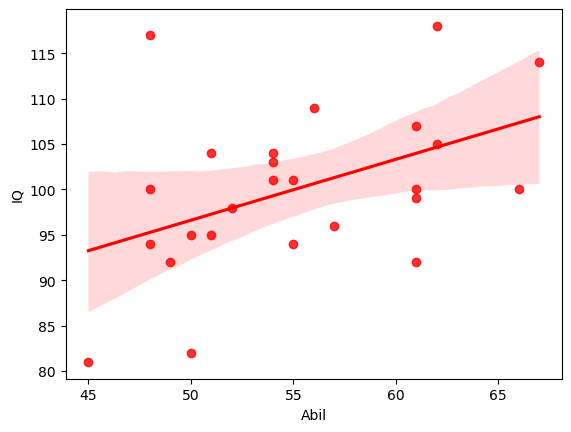

In [22]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh[['Abil', 'IQ']])
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [ ]:
# Q2a (answer with words):

The Pearson coefficient test is used for parametric data whereas the Spearman coefficient is used for non-parametric data. Parametric tests assume that the population data is normally distributed. Given the histogram plots in excercise Q1c and the results of the Shapiro-Wilk test the data seems to be normally distributed so using the Pearson coefficient test is more appropriate.


In [23]:
# Q2b (code):
corr_sepal = pg.corr(reading_ability, iq)
print(corr_sepal)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [ ]:
# Q2c (answer with words):

The `p-val` stands for p-value of the test. This value is used for hypothesis testing and can help decide whether we can reject the null hypothesis. We can reject the hypothesis that two variables are not correlated if the p-value is below 0.05, which is the case with the p-value at 0.023. 

`r` stands for the correlation coefficent. In the Pearson test the correlation coefficient denotes a linear relation and cannot accurately describe other kinds of correlations. The interpretation of the coefficient depends a lot on the field your in. The coefficient can have values between -1 and 1 with both of them denoting a perfectly negative or positive correlation. If the correlation coefficient is 0 that means there is no correlation. Therefore it is also a measure used in hypothesis testing. 

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
# H0: There are no differences in the amount of time spent reading and different reading abilities.
# H1: There are significant differences in the amount of time spent reading and different reading abilities.

In [31]:
# Q3b (code):
# Import necessary libraries --> WHAT?
import pandas as pd  ##used for WHY WOULD YOU IMPORT THIS AGAIN? IT ALREADY IS IN THE NOTEBOOK ABOVE???
from scipy.stats import chi2_contingency ##used for using statistical tests but it's not even like we use this here?

# Define the rounded average for Reading Ability and Home
abil_mean = df_mh['Abil'].mean().round(0)  
home_mean = df_mh['Home'].mean().round(0)  

print(abil_mean, home_mean) # to check the values

# Create the Rank_Abil column

df_mh['Rank_Abil'] = df_mh['Abil'] > abil_mean # this means the reading ability is above avarage


# Create the Rank_Home column <--- this isn't typical naming convetion or is it? This is neither Pascal case or Snake case?

df_mh['Rank_Home'] = df_mh['Home'] > home_mean

df_mh.head()

55.0 124.0


,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,True,True
1,2,56,109,123,608,True,False
2,3,45,81,108,640,False,False
3,4,66,100,155,493,True,True
4,5,49,92,103,636,False,False


In [56]:
# Q3c (code):
# Construct Contingency Matrix

import numpy as np # in order to make the matrix


abil_true = df_mh.loc[df_mh['Rank_Abil'] == True]

abil_true_home_true = 0
abil_true_home_false = 0

for row_value in abil_true['Rank_Home']:
    if row_value == True:
        abil_true_home_true += 1
    else:
        abil_true_home_false += 1


# print(abil_true_home_true,abil_true_home_false) # use this to test the results we got

# Now the same for the next when the reading ability is below average
# we can create the sub-dataframe called 'abil_false'

abil_false = df_mh.loc[df_mh['Rank_Abil'] == False]

abil_false_home_true = 0
abil_false_home_false = 0

for row_value in abil_false['Rank_Home']:
    if row_value == True:
        abil_false_home_true += 1
    else:
        abil_false_home_false += 1
        
# print(abil_false_home_true,abil_false_home_false) # use this to test the results we got

#let's transform this into a contingency matrix

data4contingency = []

data4contingency.append(abil_true_home_true)
data4contingency.append(abil_true_home_false)
data4contingency.append(abil_false_home_true)
data4contingency.append(abil_false_home_false)



print('The values:')
print(data4contingency)


# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix:')
print(data_cm)


The values:
[8, 2, 3, 12]
The contingency matrix:
[[ 8  2]
 [ 3 12]]


In [58]:
# Q3d (code):
# Perform the Chi-square test

chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)

print(chi2, p_value)

print('These are the expected frequencies:')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


In [ ]:
# Q3e (answer in words):

As seen above the observed differences are statiscally significant and H0 is rejected. This means that there is a significant differece when regarding people's reading ability depending on if they read more or less than the average. 

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [1]:

import pandas as pd # used for data wrangling 
from scipy import stats # statistical tests such as ttests, levene's test, etc
import numpy as np #used for calculating the mean and standard deviations
import matplotlib.pyplot as plt #
import seaborn as sns #

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [2]:
# Q4a (code):
# Calculate mean and standard deviation for age
print("The mean of the age of evaluators is:", np.mean(df_evaluators['age']))
print("The standard deviation of the age of evaluators is:",np.std(df_evaluators['age']))

The mean of the age of evaluators is: 30.852941176470587
The standard deviation of the age of evaluators is: 6.145932911241463


In [3]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

df_evaluators.groupby('sex').count()

,eval_id,condition,age
sex,,,
1.0,4,4,4
2.0,30,30,30


As we can see with the above aggregate function `count()` we have 30 female and 4 male evaluators

### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [4]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [10]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories

intellect_filter = ['competent', 'thoughtful', 'intelligent']
df_intellect = df_ratings[df_ratings['Category'].isin(intellect_filter)]
df_intellect.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
5,2,competent,5.0
6,2,thoughtful,7.0


In [28]:
# Calculate the mean intellect rating for each evaluator

mean_intellect = df_intellect.groupby('eval_id')['Rating'].mean()

# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame

df_intellect = mean_intellect.reset_index()

# Add a 'Category' column with the value 'intellect' for these rows

df_intellect['Category'] = 'intellect'
df_intellect.head()

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [75]:
# Create a DataFrame for 'impression' and 'hire' ratings

other_cat = ['impression','hire']
df_other_cat =  df_ratings[df_ratings['Category'].isin(other_cat)]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([df_intellect,df_other_cat],ignore_index = True)


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column

ratings2 = pd.merge(df_evaluators,ratings2, on='eval_id')

# Select only the necessary columns as per the structure required

ratings2 = ratings2.drop("age", axis='columns')
ratings2 = ratings2.drop("sex", axis='columns')


# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(['eval_id','Category'])


# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head(9)


,eval_id,condition,Rating,Category
0,1,listened,6.000000,intellect
1,1,listened,7.000000,impression
2,1,listened,6.000000,hire
3,2,listened,5.666667,intellect
4,2,listened,4.666667,impression
5,2,listened,4.000000,hire
6,3,listened,6.000000,intellect
7,3,listened,8.333333,impression
8,3,listened,5.000000,hire


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis:

We could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the Intellect, Hire and Impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). 

In [ ]:
# Alternative hypothesis:

Alternatively, we could state it as there will be a significant difference between overall ratings on the Intellect, Hire and Impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

We will have to use an independent samples t-test as we are comparing two different variables and the sample groups are independent. Additionally, we are looking at a two-tail difference in the samples as we are just looking for any deviation/difference but not one in a particular direction.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

The independent variable is the listen/read variable and the dependent variable are the scores for  Intellect, Hire and Impression. 

---


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [114]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for testing if it is a normal distribution, etc.

# Descriptive analysis of the ratings

ratings2.describe()


# Test for normal distribution (Shapiro-Wilk test)

intellect_filter = ratings2[ratings2['Category']=='intellect']
impression_filter = ratings2[ratings2['Category']=='impression']
hire_filter = ratings2[ratings2['Category']=='hire']

print(stats.shapiro(intellect_filter['Rating']), 'for Intellect')
print(stats.shapiro(impression_filter['Rating']),'for Impression')
print(stats.shapiro(hire_filter['Rating']),'for Hire')

# Test for homogeneity of variances (Levene's test)

# Intellect:
intellect_filter_listened = intellect_filter[intellect_filter['condition']=='listened']
intellect_filter_read = intellect_filter[intellect_filter['condition']=='read']
print('Intellect:',stats.levene(intellect_filter_listened['Rating'],intellect_filter_read['Rating']))

# Impression:
impression_filter_listened = impression_filter[impression_filter['condition']=='listened']
impression_filter_read = impression_filter[impression_filter['condition']=='read']
print('Impression:', stats.levene(impression_filter_listened['Rating'],impression_filter_read['Rating']))

hire_filter_listened = hire_filter[hire_filter['condition']=='listened']
hire_filter_read = hire_filter[hire_filter['condition']=='read']
print('Hire:', stats.levene(hire_filter_listened['Rating'],hire_filter_read['Rating']))


ShapiroResult(statistic=0.974760115146637, pvalue=0.5182614326477051) for Intellect
ShapiroResult(statistic=0.9595586657524109, pvalue=0.17238490283489227) for Impression
ShapiroResult(statistic=0.9427911043167114, pvalue=0.04710420221090317) for Hire
Intellect: LeveneResult(statistic=0.8980185752566812, pvalue=0.34946205893248505)
Impression: LeveneResult(statistic=0.39045326236607025, pvalue=0.5358960150374064)
Hire: LeveneResult(statistic=0.10663746145199855, pvalue=0.7458453933447955)


In [120]:
# Independent t-tests

print('Intellect:',stats.ttest_ind(intellect_filter_listened['Rating'],intellect_filter_read['Rating']))


print('Impression:', stats.ttest_ind(impression_filter_listened['Rating'],impression_filter_read['Rating']))


print('Hire:', stats.ttest_ind(hire_filter_listened['Rating'],hire_filter_read['Rating']))


#ratings_desc, shapiro_results, levene_results, ttest_results

Intellect: TtestResult(statistic=3.5259329220482414, pvalue=0.0011444414996286821, df=37.0)
Impression: TtestResult(statistic=2.850766179025179, pvalue=0.007091060616710596, df=37.0)
Hire: TtestResult(statistic=2.620100218173143, pvalue=0.012674511839824125, df=37.0)


In [ ]:
#Q7b (answer in words): 

We can reject the Null-Hypothesis that this is not a normal distribution for both intellect and impression scores, however the P value for the hire score is 0.047 so below 0.05. This means the Hire variable is likely not normally distributed.

For Levene's test if the p-value is greater than .05, then the variances are not significantly different from each other. As we can see however, according to the p-values for all variables the scores for read versus listening ratings are significantly different.

Lastly, for the the T-test a p-value of less than 0.05 means the results are statistically significant. Again, the p-values are 0.001, 0.007, and 0.01 for Intellect, Impression and Hire respectively. This means that the results we have a statistically significant, meaning that we can reject our initial null-hypothesis that there is no difference between listened/ read ratings.